# APP RATING PREDICTION PROJECT
## Objective:
Make a model to predict the app rating, with other information about the app provided.
## Problem Statement:
Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.
## Domain:
General
## Analysis to be done:
The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings.
## Content:
Dataset: Google Play Store data (“googleplaystore.csv”)
## Fields in the data:
•	App: Application name

•	Category: Category to which the app belongs 

•	Rating: Overall user rating of the app

•	Reviews: Number of user reviews for the app

•	Size: Size of the app

•	Installs: Number of user downloads/installs for the app

•	Type: Paid or Free

•	Price: Price of the app

•	Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult

•	Genres: An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to Music, Game, Family genres.

•	Last Updated: Date when the app was last updated on Play Store

•	Current Ver: Current version of the app available on Play Store

•	Android Ver: Minimum required Android version

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# 1) Load the data

In [3]:
df=pd.read_csv("googleplaystore.csv")

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
len(df)

10841

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# 2) Check for Null values
Check for null values in the data. Get the number of null values for each column.

In [8]:
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

# columns with missing values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

# filter on columns with missing values

Rating            1474
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
dtype: int64

# 3) Drop Records with Nulls
Drop records with nulls in any of the columns. 

In [11]:
df1=df.copy(deep=True)

# creating a copy of the original dataframe for back-up

In [12]:
df1.dropna(axis=0,inplace=True)

In [13]:
df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [14]:
len(df1)

9360

In [15]:
print("Total rows dropped: {}".format(len(df)-len(df1)))

Total rows dropped: 1481


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [17]:
df1.isnull().sum()

# null records dropped

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 4.1) Formatting Incorrect Types
Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
1.	Extract the numeric value from the column
2.	Multiply the value by 1,000, if size is mentioned in Mb


In [18]:
df1["Size"].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [19]:
df1["Size"].unique()

# there are strings with no numerical value

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [20]:
df1["Size"].value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
585k                     1
656k                     1
459k                     1
313k                     1
251k                     1
Name: Size, Length: 413, dtype: int64

In [21]:
df1[df1["Size"] == 'Varies with device']["Size"].value_counts()

# "Varies with device" will need to be removed. There are 1637

Varies with device    1637
Name: Size, dtype: int64

In [22]:
def func(x):
    x=x.strip().upper()
    if x[-1] == "M":
        return float(x[:-1])*1000
    elif x[-1] == "K":
        return float(x[:-1])
    else:
        pass
    
# simple function to return the numeric value 

In [23]:
func("2M")

# testing the function

2000.0

In [24]:
func("23k")

# testing the function

23.0

In [25]:
print(func("2"))

# testing the function

None


In [26]:
df1["Size"].apply(lambda x:func(x)).isnull().sum()

# these will need to be deleted as they are null values.

1637

In [27]:
df1["Size"] = df1["Size"].apply(lambda x:func(x))
df1["Size"].head()

# applying the function to the "Size" column

0    19000.0
1    14000.0
2     8700.0
3    25000.0
4     2800.0
Name: Size, dtype: float64

In [28]:
len(df1)

9360

In [29]:
df1.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1637
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [30]:
rem_col = len(df1)-df1["Size"].isnull().sum()
print("There should be {} rows after dropping NaN values".format(rem_col))

There should be 7723 rows after dropping NaN values


In [31]:
df1 = df1.dropna(axis=0)

In [32]:
df1.info()

# indeed, there are 7732 rows now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   object 
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   object 
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   object 
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(2), object(11)
memory usage: 844.7+ KB


# 4.2) Reviews
Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [33]:
df1.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [34]:
df1["Reviews"] = df1["Reviews"].astype(float)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   float64
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   object 
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   object 
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(3), object(10)
memory usage: 844.7+ KB


# 4.3) Strings
Installs field is currently stored as string and has values like 1,000,000+. 
1.	Treat 1,000,000+ as 1,000,000
2.	remove ‘+’, ‘,’ from the field, convert it to integer


In [36]:
df1["Installs"].head(3)

0       10,000+
1      500,000+
2    5,000,000+
Name: Installs, dtype: object

In [37]:
def install_string(x):
    x=x[:-1].split(",")
    x="".join(x)
    return int(x)

# function to remove "+" and convert string to integer.

In [38]:
install_string("10,000+")

# testing function

10000

In [39]:
install_string("1,000,000+")

# testing function

1000000

In [40]:
df1["Installs"] = df1["Installs"].apply(lambda x: install_string(x))
df1["Installs"].head()

# applying the function to the "Installs" column

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   float64
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   int64  
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   object 
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 844.7+ KB


# 4.4) Price Field
Price field is a string and has \\$ symbol. Remove "\\$" sign, and convert it to numeric.

In [42]:
df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [43]:
df1["Price"].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [44]:
def price_string(x):
    if "$" in x:
        return float(x[1:])
    return float(x)

# creating simple function

In [45]:
price_string("$3.45")

# testing function

3.45

In [46]:
price_string("0")

# testing function

0.0

In [47]:
df1["Price"].apply(lambda x: price_string(x)).unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

In [48]:
df1["Price"] = df1["Price"].apply(lambda x: price_string(x))

# applying the function to the "Price" column

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   float64
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   int64  
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   float64
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 844.7+ KB


In [50]:
df1["Price"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

# 5.1) Sanity Checks
Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [51]:
df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [52]:
len(df1)

7723

In [53]:
df1["Rating"].unique()

# unique average ratings

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [54]:
df1["Rating"].isnull().sum()

# confirming no null values in the "Rating" column

0

In [55]:
df1[(df1["Rating"]>5)|(df1["Rating"]<1)]

# dataframe only contains average ratings between 1 and 5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 5.2) Sanity Check - Reviews
Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [56]:
df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   float64
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   int64  
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   float64
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 844.7+ KB


In [58]:
df1[df1["Reviews"]>df1["Installs"]][["Reviews","Installs"]]

# the reviews that NEED to be dropped

,Reviews,Installs
2454,4.0,1
5917,2.0,1
6700,7.0,5
7402,11.0,10
8591,20.0,10
10697,2.0,1


In [59]:
len(df1[df1["Reviews"]>df1["Installs"]])

# total number of records that need to be dropped

6

In [60]:
len(df1)-len(df1[df1["Reviews"]>df1["Installs"]])

# total number of records that should be returned after dropping values

7717

In [61]:
df1[df1["Reviews"]<=df1["Installs"]].count()

# data that should remain in the dataframe

App               7717
Category          7717
Rating            7717
Reviews           7717
Size              7717
Installs          7717
Type              7717
Price             7717
Content Rating    7717
Genres            7717
Last Updated      7717
Current Ver       7717
Android Ver       7717
dtype: int64

In [62]:
df1 = df1[df1["Reviews"]<=df1["Installs"]]
df1.head(2)

# dropping values

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7717 non-null   object 
 1   Category        7717 non-null   object 
 2   Rating          7717 non-null   float64
 3   Reviews         7717 non-null   float64
 4   Size            7717 non-null   float64
 5   Installs        7717 non-null   int64  
 6   Type            7717 non-null   object 
 7   Price           7717 non-null   float64
 8   Content Rating  7717 non-null   object 
 9   Genres          7717 non-null   object 
 10  Last Updated    7717 non-null   object 
 11  Current Ver     7717 non-null   object 
 12  Android Ver     7717 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 844.0+ KB


In [64]:
len(df1)

7717

# 5.3) Sanity Check - Free Apps
For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [65]:
df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [66]:
df1["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [67]:
df1["Price"].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

In [68]:
df1["Type"].str.contains("Free")

0        True
1        True
2        True
3        True
4        True
         ... 
10833    True
10834    True
10836    True
10837    True
10840    True
Name: Type, Length: 7717, dtype: bool

In [69]:
df1[(df1["Type"].str.contains("Free")) & (df1["Price"]!=0)]

# no records need to be dropped

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [70]:
df1[df1["Type"].str.contains("Free")]["Price"].unique()

# checking the unique "Price" records when "Type" is "Free". Only 0.

array([0.])

# 6) Univariate Analysis
Performing univariate analysis:

•	Boxplot for Price: Are there any outliers? Think about the price of usual apps on Play Store.
        
•	Boxplot for Reviews: Are there any apps with very high number of reviews? Do the values seem right?
        
•	Histogram for Rating: How are the ratings distributed? Is it more toward higher ratings?
        
•	Histogram for Size: Note down your observations for the plots made above. Which of these seem to have outliers?


In [71]:
import seaborn as sns

In [72]:
df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7717 non-null   object 
 1   Category        7717 non-null   object 
 2   Rating          7717 non-null   float64
 3   Reviews         7717 non-null   float64
 4   Size            7717 non-null   float64
 5   Installs        7717 non-null   int64  
 6   Type            7717 non-null   object 
 7   Price           7717 non-null   float64
 8   Content Rating  7717 non-null   object 
 9   Genres          7717 non-null   object 
 10  Last Updated    7717 non-null   object 
 11  Current Ver     7717 non-null   object 
 12  Android Ver     7717 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 844.0+ KB


In [74]:
df1["Genres"].nunique()

112

<AxesSubplot:ylabel='Price'>

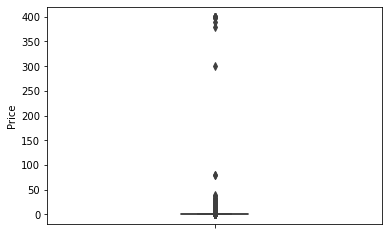

In [75]:
sns.boxplot(y="Price",data=df1, width=0.2)

In [76]:
df1["Price"].sort_values(ascending=True).tail()

# As shown above in the boxplot, there are outlier Apps which have a very high price.

5351    399.99
5358    399.99
5354    399.99
5356    399.99
4367    400.00
Name: Price, dtype: float64

In [77]:
df1["Price"].value_counts()

# The majority of Apps are Free

0.00      7142
0.99       104
2.99       101
4.99        63
1.99        53
          ... 
4.29         1
39.99        1
15.99        1
379.99       1
7.49         1
Name: Price, Length: 68, dtype: int64

In [78]:
df1["Price"].describe().transpose()

# As a result, the average price is 1.13. 

count    7717.000000
mean        1.128725
std        17.414784
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [79]:
df1[df1["Price"]>200]["Price"]

4197    399.99
4362    399.99
4367    400.00
5351    399.99
5354    399.99
5355    299.99
5356    399.99
5357    379.99
5358    399.99
5359    399.99
5362    399.99
5364    399.99
5366    389.99
5369    399.99
5373    399.99
Name: Price, dtype: float64

In [80]:
print("There are {} Apps which have a price higher than 200.\nHence, this would be considered to be outliers".format(df1[df1["Price"]>200]["Price"].count()))

There are 15 Apps which have a price higher than 200.
Hence, this would be considered to be outliers


Performing univariate analysis:
        
•	**Boxplot for Reviews:** Are there any apps with very high number of reviews? Do the values seem right?

In [81]:
df2 = df1.groupby("App").sum()

# creating a new dataframe (df2) with data summed up based on grouped Apps.

In [82]:
df2.head(2)

# checking the head of df2

,Rating,Reviews,Size,Installs,Price
App,,,,,
+Download 4 Instagram Twitter,4.5,40467.0,22000.0,1000000,0.0
- Free Comics - Comic Apps,3.5,115.0,9100.0,10000,0.0


<AxesSubplot:ylabel='Reviews'>

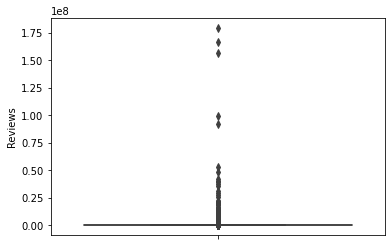

In [83]:
sns.boxplot(y="Reviews",data=df2)

In [84]:
df2.describe().transpose().iloc[1:2]

,count,mean,std,min,25%,50%,75%,max
Reviews,7017.0,324568.802907,4.244259e+06,1.0,86.0,1602.0,29155.0,179558781.0


In [85]:
df2["Reviews"].sort_values()

App
DK Browser                                 1.0
Contents Provider(C.P.)Explorer            1.0
Read it easy for BK                        1.0
Skin Disease                               1.0
EC Reps                                    1.0
                                      ...     
Clash Royale                        92530298.0
8 Ball Pool                         99386198.0
Candy Crush Saga                   156993136.0
Subway Surfers                     166331958.0
Clash of Clans                     179558781.0
Name: Reviews, Length: 7017, dtype: float64

In [86]:
arr = np.percentile(a=df2["Reviews"],q=[1, 25, 50, 75, 99])
arr

# percentile - indicates the percentage of scores that a given value is higher or greater than.

# 75th percentile (3rd Quartile) - 75% of Apps have less than 29,155 reviews
# the Median or 2nd Quartile (50th percentile) is 1.6+03. So, 50% of all Apps have less than 1.602 reviews
# since no values are less than the minimum value (1.00), that will be the 0% quantile or the 0th percentile.

array([2.00000000e+00, 8.60000000e+01, 1.60200000e+03, 2.91550000e+04,
       4.60618884e+06])

In [87]:
print("99-75 percentile: {}".format(arr[4] - arr[3])) 
print(f"75-50 percentile: {arr[3] - arr[2]}") 
print(f"50-25 percentile: {arr[2] - arr[1]}") 
print(f"25-1 percentile: {arr[1] - arr[0]}") 

# there is a vast difference between the 99% and 75% percentile.
# This indicates that the majority of Apps have very few reviews.
# But, there are few Apps that have a very high number of reviews. 

99-75 percentile: 4577033.840000013
75-50 percentile: 27553.0
50-25 percentile: 1516.0
25-1 percentile: 84.0


In [88]:
print("98% of all Apps have less than {0} reviews".format(round(np.percentile(a=df2["Reviews"],q=[98,99])[0],2)))

98% of all Apps have less than 1700395.44 reviews


Performing univariate analysis:
        
•	**Histogram for Rating:** How are the ratings distributed? Is it more toward higher ratings?

In [89]:
df1.groupby("App").mean()

# grouping by App and taking the average of each numeric feature

,Rating,Reviews,Size,Installs,Price
App,,,,,
+Download 4 Instagram Twitter,4.5,40467.0,22000.0,1000000.0,0.00
- Free Comics - Comic Apps,3.5,115.0,9100.0,10000.0,0.00
.R,4.5,259.0,203.0,10000.0,0.00
/u/app,4.7,573.0,53000.0,10000.0,0.00
058.ba,4.4,27.0,14000.0,100.0,0.00
...,...,...,...,...,...
감성학원 BL 첫사랑,4.4,190.0,34000.0,10000.0,0.00
💎 I'm rich,3.8,718.0,26000.0,10000.0,399.99
"💘 WhatsLov: Smileys of love, stickers and GIF",4.6,22098.0,18000.0,1000000.0,0.00


<AxesSubplot:xlabel='Rating', ylabel='Count'>

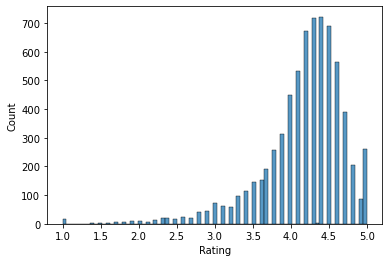

In [90]:
sns.histplot(x="Rating",data=df1.groupby("App").mean())

# Plotting histogram of "Ratings" shows a longer left tail.
# As such, the plot seems to be skewed to the right (negative skew). This indicates that most Apps have a higher average rating.
# It might be worth considering log transformation to reduces or removes the skewness of this original data.  

In [91]:
me = df1["Rating"].mean()
st = df1["Rating"].std()

print(f"The mean is: {me}")
print(f"The standard deviation is: {st}")

The mean is: 4.173292730335627
The standard deviation is: 0.544362410886321


It can be seen that the average rating per App is more towards higher ratings. Also, the average rating is 4.17 with a standard deviation of 0.54. This helps us confirm that the average App ratings a higher and close together in terms of values. 

Performing univariate analysis:
        
•	**Histogram for Size:**

In [92]:
df1["App"].nunique()

# number of unique Apps

7017

<AxesSubplot:xlabel='Size', ylabel='Count'>

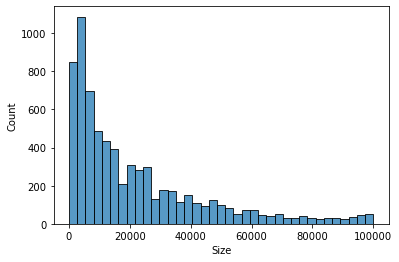

In [93]:
sns.histplot(x="Size",data=df1.groupby("App").mean())

# The plot is skewed to the left (positive skew). This indicates that most Apps have a small size.
# Again, it might be worth considering log transformation to reduces or removes the skewness of this original data.  

# 7.1) Outlier Treatment
Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

1.	Check out the records with very high price. Is 200 indeed a high price?
2.	Drop these as most seem to be junk apps


In [94]:
df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7717 non-null   object 
 1   Category        7717 non-null   object 
 2   Rating          7717 non-null   float64
 3   Reviews         7717 non-null   float64
 4   Size            7717 non-null   float64
 5   Installs        7717 non-null   int64  
 6   Type            7717 non-null   object 
 7   Price           7717 non-null   float64
 8   Content Rating  7717 non-null   object 
 9   Genres          7717 non-null   object 
 10  Last Updated    7717 non-null   object 
 11  Current Ver     7717 non-null   object 
 12  Android Ver     7717 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 844.0+ KB


In [96]:
df1["Price"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

In [97]:
# Need to be dropped:
sum(df1["Price"]>=200)

15

In [98]:
# These will be the remaining records:
sum(df1["Price"]<200)

7702

In [99]:
df1[df1["Price"]<200].count()

App               7702
Category          7702
Rating            7702
Reviews           7702
Size              7702
Installs          7702
Type              7702
Price             7702
Content Rating    7702
Genres            7702
Last Updated      7702
Current Ver       7702
Android Ver       7702
dtype: int64

In [100]:
df1 = df1[df1["Price"]<200]
df1.head(2)

# dropping Apps with a "Price" equal or higher than 200. Setting the result to the dataframe df1.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7702 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7702 non-null   object 
 1   Category        7702 non-null   object 
 2   Rating          7702 non-null   float64
 3   Reviews         7702 non-null   float64
 4   Size            7702 non-null   float64
 5   Installs        7702 non-null   int64  
 6   Type            7702 non-null   object 
 7   Price           7702 non-null   float64
 8   Content Rating  7702 non-null   object 
 9   Genres          7702 non-null   object 
 10  Last Updated    7702 non-null   object 
 11  Current Ver     7702 non-null   object 
 12  Android Ver     7702 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 842.4+ KB


In [102]:
len(df1)

7702

# 7.2) Outlier - Reviews
Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [103]:
df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [104]:
sum(df1["Reviews"]>=2000000)

# Apps which will need to be dropped

219

In [105]:
sum(df1["Reviews"]<2000000)

# Number of records which should remain after dropping the outliers.

7483

In [106]:
df1 = df1[df1["Reviews"]<2000000]

# Setting the result to the dataframe df1.

# 7.3) Outlier - Installs
Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
1.	Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
2.	Decide a threshold as cutoff for outlier and drop records having values more than that


In [107]:
df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7483 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7483 non-null   object 
 1   Category        7483 non-null   object 
 2   Rating          7483 non-null   float64
 3   Reviews         7483 non-null   float64
 4   Size            7483 non-null   float64
 5   Installs        7483 non-null   int64  
 6   Type            7483 non-null   object 
 7   Price           7483 non-null   float64
 8   Content Rating  7483 non-null   object 
 9   Genres          7483 non-null   object 
 10  Last Updated    7483 non-null   object 
 11  Current Ver     7483 non-null   object 
 12  Android Ver     7483 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 818.5+ KB


In [109]:
df2 = df1.groupby("App").sum().sort_values(by="Installs")
df2

# creating a new dataframe (df2) with data summed up based on grouped Apps.

,Rating,Reviews,Size,Installs,Price
App,,,,,
EB Cash Collections,5.0,1.0,4300.0,5,0.0
FK Atlantas,1.5,2.0,26000.0,5,0.0
Clinic Doctor EHr,5.0,2.0,7100.0,5,0.0
CB Heroes,5.0,5.0,1800.0,5,0.0
CQ ESPM,5.0,2.0,3400.0,5,0.0
...,...,...,...,...,...
Flow Free,21.5,6477706.0,55000.0,500000000,0.0
Samsung Health,4.3,480208.0,70000.0,500000000,0.0
Helix Jump,25.2,8982809.0,198000.0,600000000,0.0


In [110]:
arr = np.percentile(a=df2["Installs"],q=[10, 25, 50, 70, 90, 95, 99])
arr

array([1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+07, 5.e+07])

In [111]:
print("99-95 percentile: {}".format(arr[6] - arr[5])) 
print("95-90 percentile: {}".format(arr[5] - arr[4])) 
print("90-70 percentile: {}".format(arr[4] - arr[3])) 
print("70-50 percentile: {}".format(arr[3] - arr[2])) 
print("50-25 percentile: {}".format(arr[2] - arr[1]))
print("25-10 percentile: {}".format(arr[1] - arr[0])) 

99-95 percentile: 40000000.0
95-90 percentile: 0.0
90-70 percentile: 9000000.0
70-50 percentile: 900000.0
50-25 percentile: 90000.0
25-10 percentile: 9000.0


There is a vast difference between the 99% and 95% percentile.
There are few Apps that have a very high number of installs. 

In [112]:
print("95% of all Apps have less than {0} installs".format(int(np.percentile(a=df2["Installs"],q=[95,99])[0])))

95% of all Apps have less than 10000000 installs


In [113]:
# cut off at 95% (included) as there is a 40 million number of installs difference between 99% and 95% percentiles.

df1["Installs"]<=df1["Installs"].quantile(q=0.95)

0         True
1         True
2         True
3        False
4         True
         ...  
10833     True
10834     True
10836     True
10837     True
10840     True
Name: Installs, Length: 7483, dtype: bool

In [114]:
df1[df1["Installs"]<=df1["Installs"].quantile(q=0.95)]["Installs"].unique()

array([   10000,   500000,  5000000,   100000,    50000,  1000000,
       10000000,     5000,     1000,      100,      500,       10,
              5,       50], dtype=int64)

In [115]:
va = np.percentile(a=df2["Installs"],q=[95])
print("95% of all Apps have less than {0} reviews".format(round(va[0],2)))

95% of all Apps have less than 10000000.0 reviews


In [116]:
len(df1[df1["Installs"]<df1["Installs"].quantile(q=0.95)])

6489

In [117]:
print("There should be {0} records left in the dataframe after dropping outliers.".format(len(df1[df1["Installs"]<=df1["Installs"].quantile(q=0.95)])))

There should be 7307 records left in the dataframe after dropping outliers.


In [118]:
df1 = df1[df1["Installs"]<=df1["Installs"].quantile(q=0.95)]

In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7307 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7307 non-null   object 
 1   Category        7307 non-null   object 
 2   Rating          7307 non-null   float64
 3   Reviews         7307 non-null   float64
 4   Size            7307 non-null   float64
 5   Installs        7307 non-null   int64  
 6   Type            7307 non-null   object 
 7   Price           7307 non-null   float64
 8   Content Rating  7307 non-null   object 
 9   Genres          7307 non-null   object 
 10  Last Updated    7307 non-null   object 
 11  Current Ver     7307 non-null   object 
 12  Android Ver     7307 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 799.2+ KB


# 8.1) Bivariate analysis - Rating vs Price
Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.
1.	Make scatter plot/joinplot for Rating vs. Price: What pattern do you observe? Does rating increase with price?


In [120]:
import seaborn as sns

In [121]:
df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [122]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7307 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7307 non-null   object 
 1   Category        7307 non-null   object 
 2   Rating          7307 non-null   float64
 3   Reviews         7307 non-null   float64
 4   Size            7307 non-null   float64
 5   Installs        7307 non-null   int64  
 6   Type            7307 non-null   object 
 7   Price           7307 non-null   float64
 8   Content Rating  7307 non-null   object 
 9   Genres          7307 non-null   object 
 10  Last Updated    7307 non-null   object 
 11  Current Ver     7307 non-null   object 
 12  Android Ver     7307 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 799.2+ KB


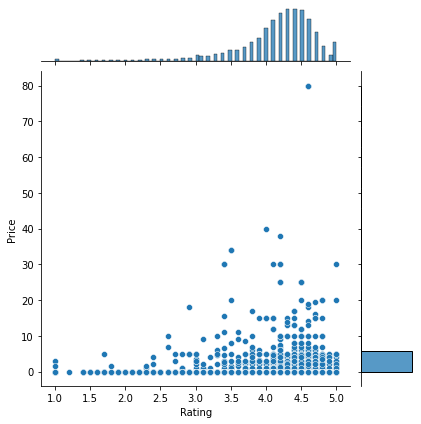

In [123]:
sns.jointplot(x="Rating",y="Price",data=df1,palette="viridis")

# From the marginal distributions it is observed that:
# As the price incerases, the ratings decrease.
# The majority of highly rated Apps have a very small price or are free.
# Also, there seems to be an outlier App which has a high rating despite being very expensive. 

# 8.2) Rating vs Size
Make scatter plot/joinplot for Rating vs. Size: Are heavier apps rated better?


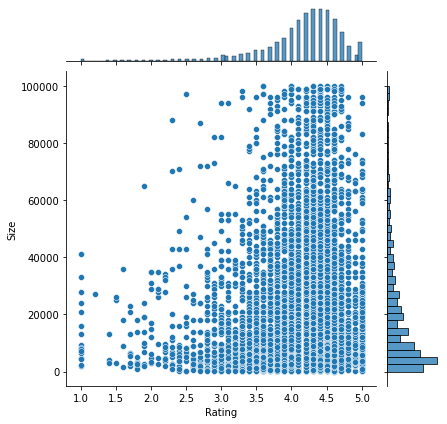

In [124]:
sns.jointplot(x="Rating",y="Size",data=df1,palette="viridis")

# It seems from the joinplot that heavier apps are NOT rated better

# 8.3) Rating vs Reviews
Make scatter plot/joinplot for Rating vs. Reviews: Does more review mean a better rating always?


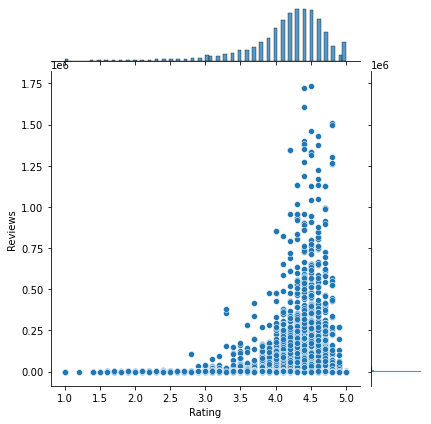

In [125]:
sns.jointplot(x="Rating",y="Reviews",data=df1,palette="viridis")

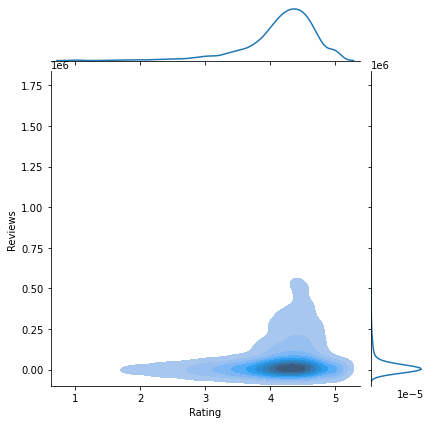

In [126]:
sns.jointplot(x="Rating",y="Reviews",data=df1,palette="viridis",kind="kde",shade=True)

From the marginal distributions, it can be observed that that Apps with a lower number of reviews tend to have higher ratings. 

# 8.4) Rating vs Content Rating
Make boxplot for Rating vs. Content Rating: Is there any difference in the ratings? Are some types liked better?


In [127]:
df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [128]:
df1.groupby("Content Rating").mean()["Rating"].sort_values(ascending=False)

# average rating per "Content Rating" category

Content Rating
Adults only 18+    4.550000
Everyone 10+       4.222711
Teen               4.210318
Everyone           4.158108
Unrated            4.100000
Mature 17+         4.089916
Name: Rating, dtype: float64

In [129]:
df1.groupby("Content Rating").count()["Rating"]

# number of individual ratings per "Content Rating" category

Content Rating
Adults only 18+       2
Everyone           5889
Everyone 10+        273
Mature 17+          357
Teen                785
Unrated               1
Name: Rating, dtype: int64

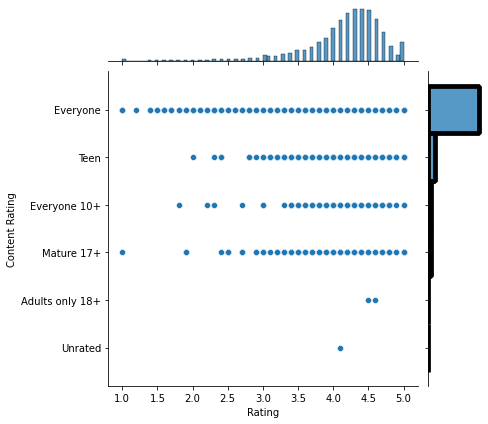

In [130]:
sns.jointplot(x="Rating",y="Content Rating",data=df1,palette="viridis")

It can be seen  that the Content Rating with the highest average rating is "Adults only 18+". However, only 2 people provided a rating. On the other hand, the "Everyone" Content Rating has the highest number of ratings with an average of 4.15.
Overall, it seems that all Content Ratings are linked since the average rating is high. But, "Everyone" Content Rating has the highest number of high ratings - therefore liked better.

# 8.5) Ratings vs Category
Make boxplot for Ratings vs. Category: Which genre has the best ratings?


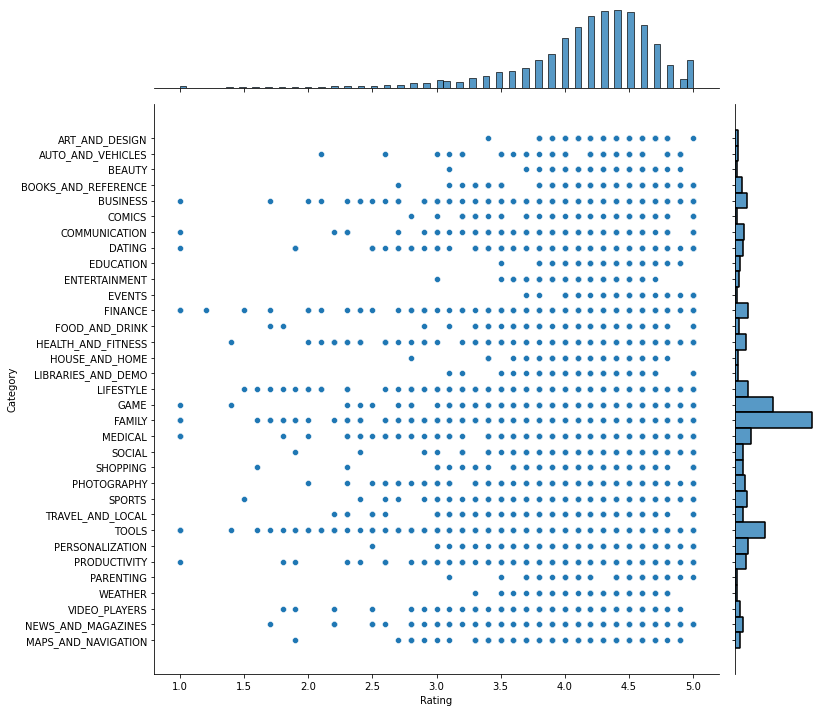

In [131]:
sns.jointplot(x="Rating",y="Category",data=df1,palette="viridis",height=10,ratio=6)

# from the plot below, "FAMILY" seems to have the highest number of user ratings amongst the genres.
# Overall, all App "Categories" have a high averge rating.

In [132]:
df_rate = df1.groupby("Category").mean()["Rating"].sort_values(ascending=False)
df_rate

# average rating per App "Category"

Category
EVENTS                 4.478947
EDUCATION              4.387273
ART_AND_DESIGN         4.378947
PARENTING              4.347727
BOOKS_AND_REFERENCE    4.320139
PERSONALIZATION        4.318081
BEAUTY                 4.291892
SOCIAL                 4.252096
WEATHER                4.238000
GAME                   4.231322
HEALTH_AND_FITNESS     4.223423
SHOPPING               4.215476
LIBRARIES_AND_DEMO     4.204918
SPORTS                 4.200000
FAMILY                 4.185687
MEDICAL                4.181734
HOUSE_AND_HOME         4.162500
NEWS_AND_MAGAZINES     4.149697
AUTO_AND_VEHICLES      4.147619
ENTERTAINMENT          4.146341
COMICS                 4.130612
PRODUCTIVITY           4.125339
PHOTOGRAPHY            4.120188
BUSINESS               4.119008
FINANCE                4.113953
LIFESTYLE              4.101832
FOOD_AND_DRINK         4.097619
COMMUNICATION          4.076166
TRAVEL_AND_LOCAL       4.043125
MAPS_AND_NAVIGATION    4.009574
VIDEO_PLAYERS          3.999057

In [133]:
df_numrate = df1.groupby("Category").count()["Rating"].sort_values(ascending=False)
df_numrate

# number of individual ratings per App "Category"

Category
FAMILY                 1558
GAME                    779
TOOLS                   607
MEDICAL                 323
LIFESTYLE               273
PERSONALIZATION         271
FINANCE                 258
BUSINESS                242
SPORTS                  239
HEALTH_AND_FITNESS      222
PRODUCTIVITY            221
PHOTOGRAPHY             213
COMMUNICATION           193
DATING                  173
SHOPPING                168
SOCIAL                  167
NEWS_AND_MAGAZINES      165
TRAVEL_AND_LOCAL        160
BOOKS_AND_REFERENCE     144
EDUCATION               110
VIDEO_PLAYERS           106
MAPS_AND_NAVIGATION      94
FOOD_AND_DRINK           84
ENTERTAINMENT            82
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       61
ART_AND_DESIGN           57
HOUSE_AND_HOME           56
WEATHER                  50
COMICS                   49
PARENTING                44
EVENTS                   38
BEAUTY                   37
Name: Rating, dtype: int64

In [134]:
df3 = pd.concat([df_rate,df_numrate], axis=1,join='outer')
df3

,Rating,Rating
EVENTS,4.478947,38
EDUCATION,4.387273,110
ART_AND_DESIGN,4.378947,57
PARENTING,4.347727,44
BOOKS_AND_REFERENCE,4.320139,144
PERSONALIZATION,4.318081,271
BEAUTY,4.291892,37
SOCIAL,4.252096,167
WEATHER,4.238000,50
GAME,4.231322,779


In [135]:
df3.columns.names = ["App Ratings"]
df3.columns = ["Avg Rating","Num of Ratings"]

df3.index.names = ["App Category"]

df3

,Avg Rating,Num of Ratings
App Category,,
EVENTS,4.478947,38
EDUCATION,4.387273,110
ART_AND_DESIGN,4.378947,57
PARENTING,4.347727,44
BOOKS_AND_REFERENCE,4.320139,144
PERSONALIZATION,4.318081,271
BEAUTY,4.291892,37
SOCIAL,4.252096,167
WEATHER,4.238000,50


In [136]:
df3["Rating"] = (df3["Num of Ratings"]/df3["Num of Ratings"].sum())*df3["Avg Rating"]

# creating a new column called "Rating"
# this includes the ratio of users who provided a review per App category times the average rating for that category.
# this is also the probability that a user likes an App category times the average rating.

In [137]:
df3.sort_values(by=["Rating"],ascending=False).head()

,Avg Rating,Num of Ratings,Rating
App Category,,,
FAMILY,4.185687,1558,0.892473
GAME,4.231322,779,0.451102
TOOLS,3.995222,607,0.331887
MEDICAL,4.181734,323,0.184850
PERSONALIZATION,4.318081,271,0.160148


The genre with the highest average rating is "EVENTS" with a score of 4.478947 out of 5 from 38 user reviews. But, when considering the number of user ratings, the highest was "FAMILY" with 1558 and an overall rating of 4.19.
In order to compare the results, I used the ratio of users who provided a review and times this by the averge App category rating. Hence, the genre with the best overall ratings given the number of ratings 
is "FAMILY".

# 9.1) Data Processing
For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.
1.	Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [138]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7307 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7307 non-null   object 
 1   Category        7307 non-null   object 
 2   Rating          7307 non-null   float64
 3   Reviews         7307 non-null   float64
 4   Size            7307 non-null   float64
 5   Installs        7307 non-null   int64  
 6   Type            7307 non-null   object 
 7   Price           7307 non-null   float64
 8   Content Rating  7307 non-null   object 
 9   Genres          7307 non-null   object 
 10  Last Updated    7307 non-null   object 
 11  Current Ver     7307 non-null   object 
 12  Android Ver     7307 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 799.2+ KB


In [139]:
inp1 = df1.copy(deep=True)
inp1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [140]:
inp1["Reviews log"] = np.log1p(inp1["Reviews"])

# Calculates natural log: ln(1 + x)
# e.g: ln(1 + 159.0) = 5.075174

In [141]:
inp1["Installs log"] = np.log1p(inp1["Installs"])

In [142]:
inp1.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews log,Installs log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,5.075174,9.210440
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,6.875232,13.122365
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,11.379520,15.424949
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,6.875232,11.512935


# 9.2) Data Processing - Dropping Columns
Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [143]:
inp1.drop(["App","Last Updated","Current Ver","Android Ver","Type"],axis=1)

# resulting dataframe but this is not in-place.
# the "Type" column will also be droped since it only has Paid or Free categories.
# This is duplicate information since there is also the "Price" column which already has the price of the app.

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Reviews log,Installs log
0,ART_AND_DESIGN,4.1,159.0,19000.0,10000,0.0,Everyone,Art & Design,5.075174,9.210440
1,ART_AND_DESIGN,3.9,967.0,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play,6.875232,13.122365
2,ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,0.0,Everyone,Art & Design,11.379520,15.424949
4,ART_AND_DESIGN,4.3,967.0,2800.0,100000,0.0,Everyone,Art & Design;Creativity,6.875232,11.512935
5,ART_AND_DESIGN,4.4,167.0,5600.0,50000,0.0,Everyone,Art & Design,5.123964,10.819798
...,...,...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,4.8,44.0,619.0,1000,0.0,Everyone,Books & Reference,3.806662,6.908755
10834,FAMILY,4.0,7.0,2600.0,500,0.0,Everyone,Education,2.079442,6.216606
10836,FAMILY,4.5,38.0,53000.0,5000,0.0,Everyone,Education,3.663562,8.517393
10837,FAMILY,5.0,4.0,3600.0,100,0.0,Everyone,Education,1.609438,4.615121


In [144]:
inp1 = inp1.drop(["App","Last Updated","Current Ver","Android Ver","Type"],axis=1)
inp1.head(2)

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Reviews log,Installs log
0,ART_AND_DESIGN,4.1,159.0,19000.0,10000,0.0,Everyone,Art & Design,5.075174,9.210440
1,ART_AND_DESIGN,3.9,967.0,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play,6.875232,13.122365


# 9.3) Data Processing - Dummy Columns
Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [145]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7307 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        7307 non-null   object 
 1   Rating          7307 non-null   float64
 2   Reviews         7307 non-null   float64
 3   Size            7307 non-null   float64
 4   Installs        7307 non-null   int64  
 5   Price           7307 non-null   float64
 6   Content Rating  7307 non-null   object 
 7   Genres          7307 non-null   object 
 8   Reviews log     7307 non-null   float64
 9   Installs log    7307 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 627.9+ KB


In [146]:
inp1.select_dtypes(["object"])

# features which are currently strings

,Category,Content Rating,Genres
0,ART_AND_DESIGN,Everyone,Art & Design
1,ART_AND_DESIGN,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,Everyone,Art & Design
4,ART_AND_DESIGN,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,Everyone,Art & Design
...,...,...,...
10833,BOOKS_AND_REFERENCE,Everyone,Books & Reference
10834,FAMILY,Everyone,Education
10836,FAMILY,Everyone,Education
10837,FAMILY,Everyone,Education


In [147]:
inp1[inp1.select_dtypes(["object"]).columns].nunique().sort_values(ascending=False)

# number of unique categories per feature with object format.
# It can be see that from just 3 initial categorical variables, we end up with 151 new variables.
# These numbers are still not huge, and in practice I could work with them relatively easily.
# However, in business datasets, it is not unusual to find several categorical variables with multiple labels.
# And if one hot encoding is used on them, the datasets will end up with thousands of columns.

Genres            112
Category           33
Content Rating      6
dtype: int64

In the winning solution of the KDD 2009 cup: "Winning the KDD Cup Orange Challenge with Ensemble Selection" (http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf), the authors limit one hot encoding to the 10 most frequent labels of the variable. In this project, I will use the same technique but I will only apply it to the "Genres" feature.

In [148]:
inp1.head(3)

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Reviews log,Installs log
0,ART_AND_DESIGN,4.1,159.0,19000.0,10000,0.0,Everyone,Art & Design,5.075174,9.210440
1,ART_AND_DESIGN,3.9,967.0,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play,6.875232,13.122365
2,ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,0.0,Everyone,Art & Design,11.379520,15.424949


In [149]:
inp1["Genres"].value_counts().sort_values(ascending=False).head(10)

# top 10 repeating categories of the Genrs feature

Tools              607
Entertainment      427
Education          417
Medical            323
Lifestyle          272
Personalization    271
Action             268
Finance            258
Sports             242
Business           242
Name: Genres, dtype: int64

In [150]:
top_10_Genres = [x for x in inp1["Genres"].value_counts().sort_values(ascending=False).head(10).index]
top_10_Genres

# list comprehension of 10 most repeating categories of the "Genres" feature

['Tools',
 'Entertainment',
 'Education',
 'Medical',
 'Lifestyle',
 'Personalization',
 'Action',
 'Finance',
 'Sports',
 'Business']

In [151]:
inp1["Genres"] == "Tools"

0        False
1        False
2        False
4        False
5        False
         ...  
10833    False
10834    False
10836    False
10837    False
10840    False
Name: Genres, Length: 7307, dtype: bool

In [152]:
np.where(inp1["Genres"] == "Tools",1,0)

array([0, 0, 0, ..., 0, 0, 0])

In [153]:
unique_elements , counts = np.unique(np.where(inp1["Genres"] == "Tools",1,0), return_counts=True)

In [154]:
print(np.asarray((unique_elements,counts)))

# confirming the value counts of the ones and zeros for the numpy array

[[   0    1]
 [6700  607]]


In [155]:
pd.DataFrame(data=np.where(inp1["Genres"]=="Tools",1,0), columns=["Tools"], index=inp1["Genres"]).sort_values(by="Tools")

# creating new test dataframe to check if the code above works as expected

,Tools
Genres,
Art & Design,0
Lifestyle,0
Entertainment,0
Books & Reference,0
Lifestyle,0
...,...
Tools,1
Tools,1
Tools,1


Creating a simple function to complete the steps above:

In [156]:
def one_hot_encoder(df, feature):
    top_10_categories = [x for x in df[feature].value_counts().sort_values(ascending=False).head(10).index]
    
    for category in top_10_categories:
        df[feature[:3]+"_"+category] = np.where(df[feature]==category,1,0)
        
# simple function that creates 10 columns (dummy variables) in the original dataframe
# only includes the 10 most repeating categories of a feature

In [157]:
inp1.shape

# initial inp1 dataframe shape: 7307 records by 10 columns

(7307, 10)

In [158]:
inp2 = inp1.copy(deep=True)

# creating a deep copy of inp1 named inp2 (changes to inp2 will not be reflected in inp1)

In [159]:
one_hot_encoder(inp2,"Genres")

# applying the function to inp2 and the "Genres" feature

In [160]:
inp2.head()

# checking the head of inp2

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Reviews log,Installs log,Gen_Tools,Gen_Entertainment,Gen_Education,Gen_Medical,Gen_Lifestyle,Gen_Personalization,Gen_Action,Gen_Finance,Gen_Sports,Gen_Business
0,ART_AND_DESIGN,4.1,159.0,19000.0,10000,0.0,Everyone,Art & Design,5.075174,9.210440,0,0,0,0,0,0,0,0,0,0
1,ART_AND_DESIGN,3.9,967.0,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play,6.875232,13.122365,0,0,0,0,0,0,0,0,0,0
2,ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,0.0,Everyone,Art & Design,11.379520,15.424949,0,0,0,0,0,0,0,0,0,0
4,ART_AND_DESIGN,4.3,967.0,2800.0,100000,0.0,Everyone,Art & Design;Creativity,6.875232,11.512935,0,0,0,0,0,0,0,0,0,0
5,ART_AND_DESIGN,4.4,167.0,5600.0,50000,0.0,Everyone,Art & Design,5.123964,10.819798,0,0,0,0,0,0,0,0,0,0


In [161]:
inp2.shape

# inp2 dataframe shape: 7307 records by 20 columns

(7307, 20)

In [162]:
inp2.drop(labels=["Genres"],axis=1,inplace=True)

# dropping the "Genres" feature from the dataframe since there are dummy variables now
# there are 7307 records by 19 columns in the inp2 dataframe

In [163]:
inp2 = pd.get_dummies(data=inp2,columns=['Category','Content Rating'],drop_first=True)
inp2

# total columns =  19 (initial inp2 columns) + 33 ("Category") + 6("Content Rating")
#     - 2 (drop_first=True) - 2 (inital "Category" & "Content Rating") = 54 columns

,Rating,Reviews,Size,Installs,Price,Reviews log,Installs log,Gen_Tools,Gen_Entertainment,Gen_Education,...,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159.0,19000.0,10000,0.0,5.075174,9.210440,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967.0,14000.0,500000,0.0,6.875232,13.122365,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510.0,8700.0,5000000,0.0,11.379520,15.424949,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,967.0,2800.0,100000,0.0,6.875232,11.512935,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,167.0,5600.0,50000,0.0,5.123964,10.819798,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,4.8,44.0,619.0,1000,0.0,3.806662,6.908755,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10834,4.0,7.0,2600.0,500,0.0,2.079442,6.216606,0,0,1,...,0,0,0,0,0,1,0,0,0,0
10836,4.5,38.0,53000.0,5000,0.0,3.663562,8.517393,0,0,1,...,0,0,0,0,0,1,0,0,0,0
10837,5.0,4.0,3600.0,100,0.0,1.609438,4.615121,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [164]:
inp2.shape

(7307, 54)

In [165]:
inp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7307 entries, 0 to 10840
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rating                        7307 non-null   float64
 1   Reviews                       7307 non-null   float64
 2   Size                          7307 non-null   float64
 3   Installs                      7307 non-null   int64  
 4   Price                         7307 non-null   float64
 5   Reviews log                   7307 non-null   float64
 6   Installs log                  7307 non-null   float64
 7   Gen_Tools                     7307 non-null   int32  
 8   Gen_Entertainment             7307 non-null   int32  
 9   Gen_Education                 7307 non-null   int32  
 10  Gen_Medical                   7307 non-null   int32  
 11  Gen_Lifestyle                 7307 non-null   int32  
 12  Gen_Personalization           7307 non-null   int32  
 13  Ge

# 10 & 11) Train test split - 70/30 & Seperating the dataframe
Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.
Separate the dataframes into X_train, y_train, X_test, and y_test.

In [166]:
inp2.head(3)

,Rating,Reviews,Size,Installs,Price,Reviews log,Installs log,Gen_Tools,Gen_Entertainment,Gen_Education,...,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159.0,19000.0,10000,0.0,5.075174,9.210440,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967.0,14000.0,500000,0.0,6.875232,13.122365,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510.0,8700.0,5000000,0.0,11.379520,15.424949,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [167]:
X = inp2.drop(labels=["Rating"],axis=1)
X

,Reviews,Size,Installs,Price,Reviews log,Installs log,Gen_Tools,Gen_Entertainment,Gen_Education,Gen_Medical,...,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,159.0,19000.0,10000,0.0,5.075174,9.210440,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,967.0,14000.0,500000,0.0,6.875232,13.122365,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,87510.0,8700.0,5000000,0.0,11.379520,15.424949,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,967.0,2800.0,100000,0.0,6.875232,11.512935,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,167.0,5600.0,50000,0.0,5.123964,10.819798,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,44.0,619.0,1000,0.0,3.806662,6.908755,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10834,7.0,2600.0,500,0.0,2.079442,6.216606,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
10836,38.0,53000.0,5000,0.0,3.663562,8.517393,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
10837,4.0,3600.0,100,0.0,1.609438,4.615121,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [168]:
y = inp2["Rating"]
y

0        4.1
1        3.9
2        4.7
4        4.3
5        4.4
        ... 
10833    4.8
10834    4.0
10836    4.5
10837    5.0
10840    4.5
Name: Rating, Length: 7307, dtype: float64

In [169]:
y.value_counts().head(10)

# As mentioned earlier, the dataset is imbalanced. This is added to the fact that this is a regression task.

4.4    742
4.3    739
4.5    721
4.2    690
4.6    599
4.1    582
4.0    473
4.7    417
3.9    328
3.8    266
Name: Rating, dtype: int64

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [172]:
print("The train dataframe is created with "+str(len(X_train))+" records.","The test dataframe created with "+str(len(X_test))+" records.",sep="\n")

The train dataframe is created with 5114 records.
The test dataframe created with 2193 records.


In [173]:
X_train.shape

(5114, 53)

In [174]:
X_test.shape

(2193, 53)

# 12) Model building
•	Use linear regression as the technique

•	Report the R2 on the train set

In [175]:
from sklearn.preprocessing import MinMaxScaler

In [176]:
scaler = MinMaxScaler()

In [177]:
X_train = scaler.fit_transform(X_train)
X_train

array([[2.29709741e-03, 1.09159279e-02, 9.99950500e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.15459212e-02, 2.59172030e-02, 4.99999750e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.30400944e-06, 2.99940495e-01, 9.95000498e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.48020856e-02, 9.49995750e-01, 4.99999750e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.48660219e-03, 1.19925194e-01, 9.99950500e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.14272878e-04, 1.13509648e-03, 9.99500500e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [178]:
X_test = scaler.transform(X_test)
X_test

array([[5.52962265e-05, 1.89166079e-02, 9.99500500e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.52403543e-02, 3.29943045e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.33602595e-06, 1.39926894e-01, 9.95000498e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.38240566e-05, 3.69181380e-02, 9.95000498e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.89602005e-05, 4.50538296e-03, 9.99500500e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.23361734e-04, 1.79165229e-02, 9.99950500e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

It is important to note that another requirement for this project was the use of linear regression, so the model I experimented with is a linear regression modell.

In [179]:
from sklearn.linear_model import LinearRegression

In [180]:
lm = LinearRegression()

In [181]:
lm.fit(X_train,y_train)

LinearRegression()

In [182]:
lm.coef_

array([-0.30834216, -0.00960724,  0.18293428, -0.48521337,  2.38968428,
       -2.26518742, -0.24020297, -0.01295644,  0.19437091, -0.09796541,
        0.29561356, -0.10910434,  0.0351572 , -0.2017359 ,  0.17028579,
       -0.18294298, -0.32557141, -0.07966834, -0.21698851, -0.18294298,
       -0.39157352, -0.48101322, -0.52220242, -0.31072532, -0.39072863,
        0.02800499, -0.3715388 , -0.2017359 , -0.45946779, -0.40537019,
       -0.28208912, -0.32487453, -0.18788494, -0.67695483, -0.53232018,
       -0.09796541, -0.34409379, -0.08220339, -0.10910434, -0.39326989,
       -0.39773962, -0.34471356, -0.32408295, -0.55235526, -0.24020297,
       -0.41766444, -0.46044164, -0.33075462, -0.22959983, -0.28754053,
       -0.2795725 , -0.24543042, -0.18079901])

In [183]:
pd.DataFrame(data=lm.coef_, columns=["Coef"], index=X.columns).sort_values(by="Coef",ascending=False).head(10)

,Coef
Reviews log,2.389684
Gen_Lifestyle,0.295614
Gen_Education,0.194371
Installs,0.182934
Gen_Sports,0.170286
Gen_Action,0.035157
Category_EVENTS,0.028005
Size,-0.009607
Gen_Entertainment,-0.012956
Category_BEAUTY,-0.079668


If we are able to hold all other features fixed and change the value of "Installs" by one unit, the associated coefficient would be 0.183. On the other hand, a one unit increase in App "Size" only results in -0.0096. Reviews Log had the greatest coefficient at 2.38968.

# 13) Predictions and Report
Make predictions on test set and report R2.

In [184]:
lm_pred = lm.predict(X_test)
lm_pred

array([3.96799891, 4.24271111, 3.96192372, ..., 4.00077259, 4.14151691,
       3.85975087])

Text(0, 0.5, 'Predicted Y')

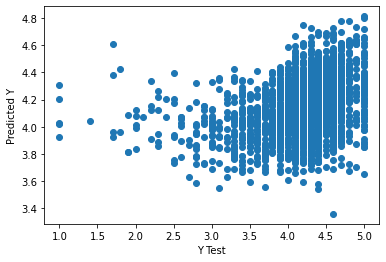

In [185]:
plt.scatter(x=y_test, y=lm_pred)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")

The linear model does not seems to be a very good fit. A good model plot would have been a smooth diagonal plot.

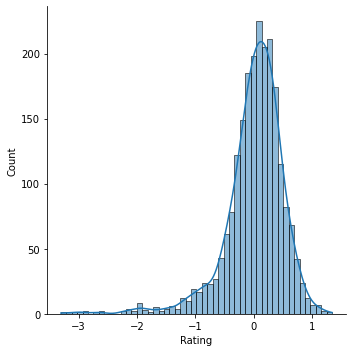

In [186]:
sns.displot(data=(y_test-lm_pred),kde=True,bins=50)

# Now I will explore the residuals to make sure everything was okay with the data.
# I will plot a histogram of the residuals and make sure it looks normally distributed 
# the plot shows a longer left tail

In [187]:
from sklearn import metrics

In [188]:
print("MAE: ",metrics.mean_absolute_error(y_test,lm_pred),sep="")

MAE: 0.35722041439244423


In [189]:
print("MSE: ",metrics.mean_squared_error(y_test,lm_pred),sep="")

MSE: 0.25681616949531305


In [190]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,lm_pred)),sep="")

RMSE: 0.5067703320985879


In [191]:
print("R^2: ",metrics.explained_variance_score(y_test,lm_pred),sep="")
print("The model is closer to 0 than it is to 1. This confirms that the model is not that good.")

R^2: 0.11777730580227419
The model is closer to 0 than it is to 1. This confirms that the model is not that good.


In [192]:
def Prediction_func(gf, rf, gn, rn, title):
    
    plt.figure(figsize=(10,10))

    axis1 = sns.kdeplot(gf, color="g", label=gn)
    axis2 = sns.kdeplot(rf, color="r", label=rn, ax=axis1)

    plt.title(title)
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.legend(bbox_to_anchor=[1,0.5])

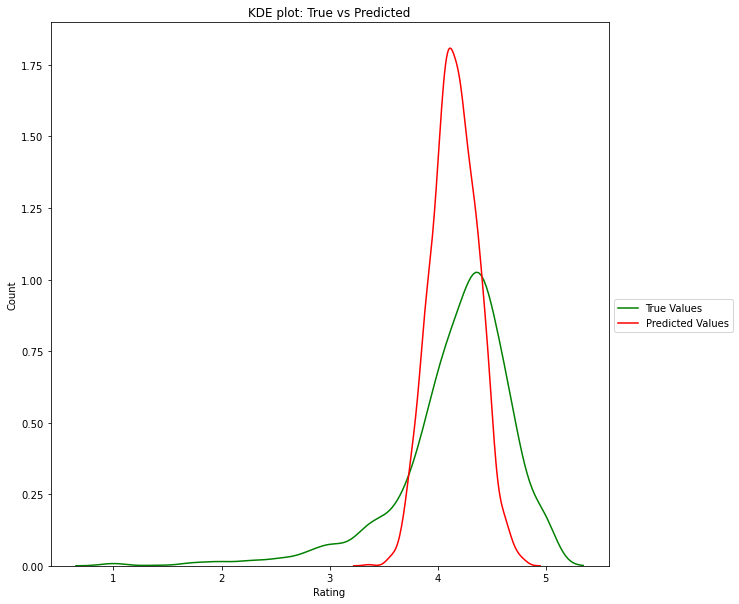

In [193]:
title = 'KDE plot: True vs Predicted'
Prediction_func(y_test,lm_pred, "True Values", "Predicted Values", title)

Regression problems with imbalanced dataset present a different challenge than a binary classification problem. The skewed distribution makes many conventional machine learning algorithms less effective, especially in predicting minority values. In this case, the linear regression model did not do particularly well.
The kernel density estimate (KDE) plot above helps to visualize the distribution of true and predicted values. The true values plot shows a longer left tail. But, the linear regression model did not present such lower rating predictions and estimated the majority of values to be close around the 4 user rating.